In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares, curve_fit
from scipy.stats import poisson, chi2, f, mode

In [7]:
def psd(f,alpha):
    return A/(f**2+(alpha/(2*np.pi*beta))**2)

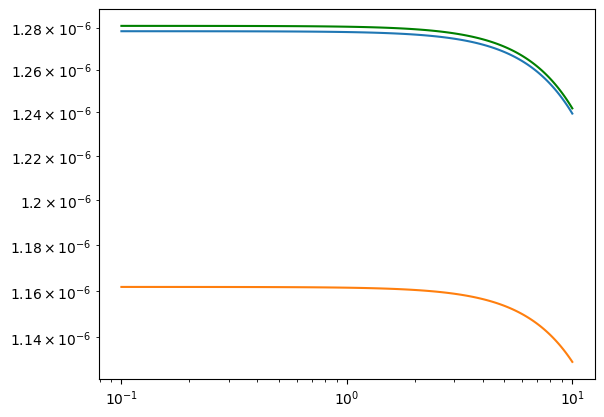

In [ ]:
plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10), color='green') 
plt.yscale('log')
plt.xscale('log')

plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10.01)) 
plt.yscale('log')
plt.xscale('log')

plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10.5)) 
plt.yscale('log')
plt.xscale('log')

10_15\100.6_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


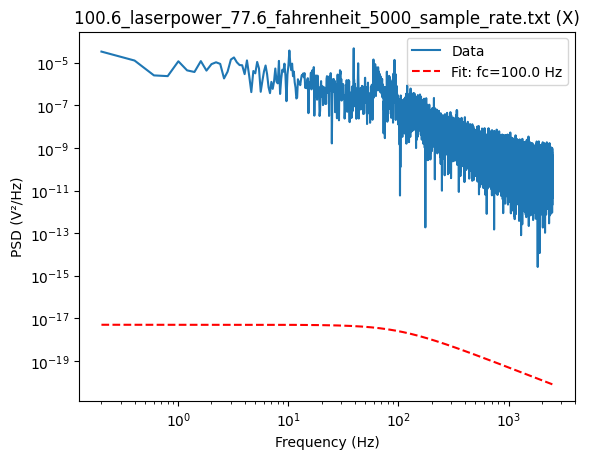

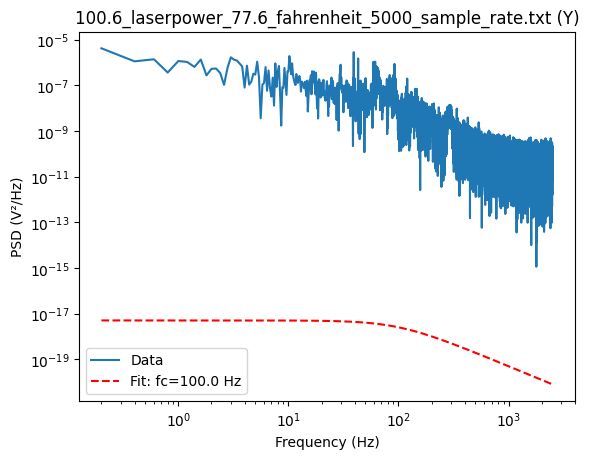

10_15\150.6_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


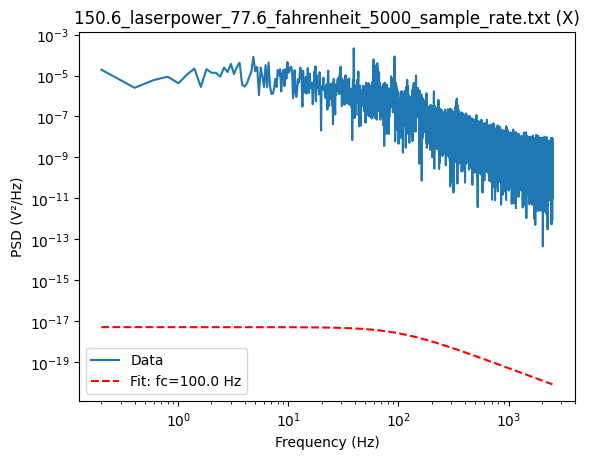

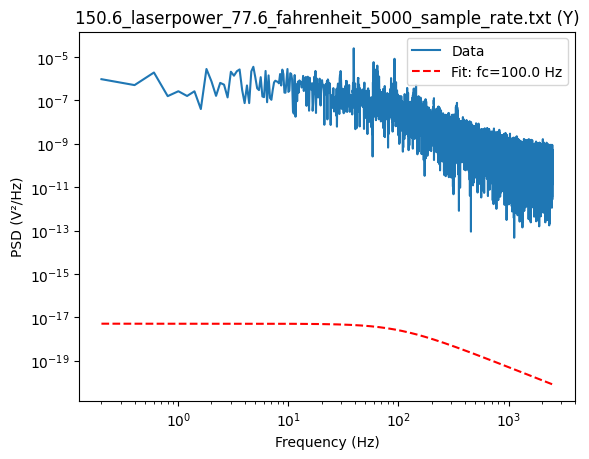

10_15\230.5_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


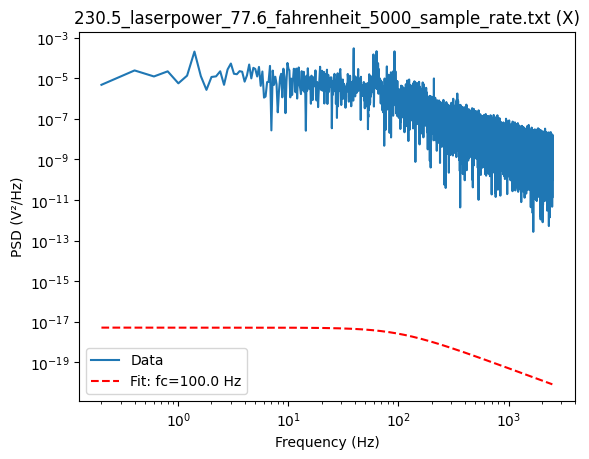

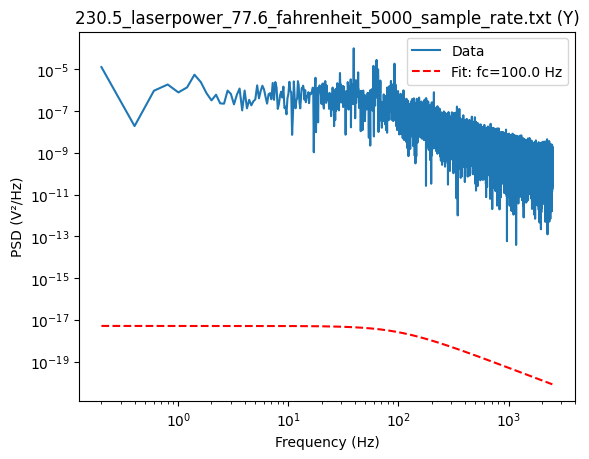

10_15\2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate.txt


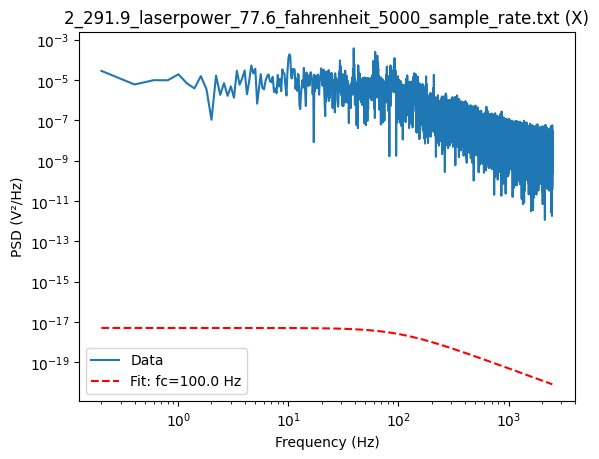

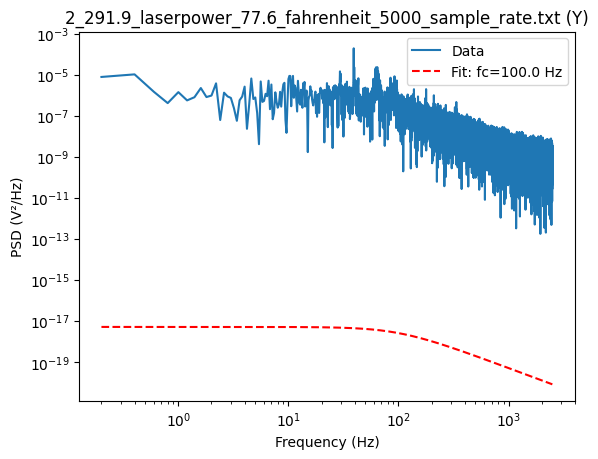

10_15\2_357.6_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\2_357.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


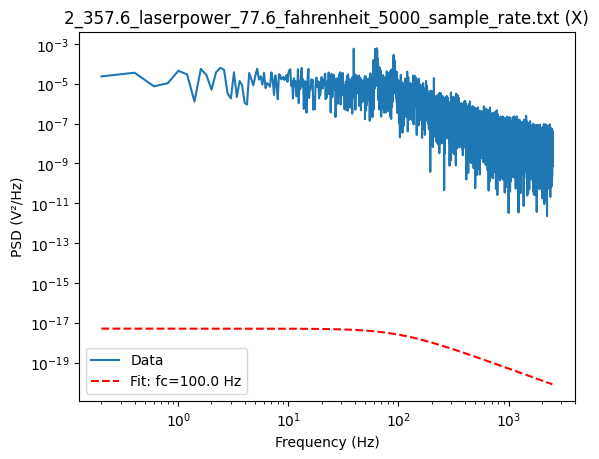

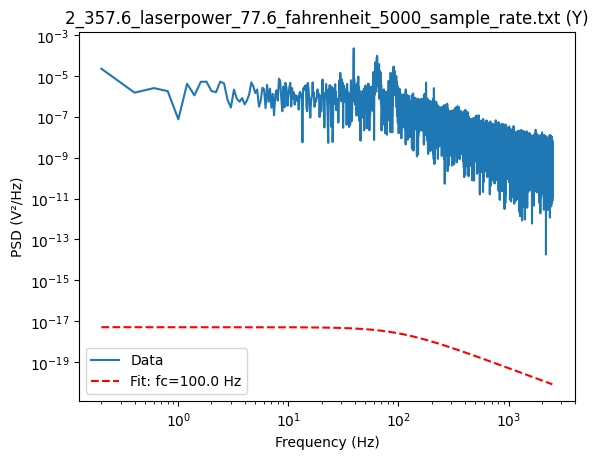

10_15\2_459.7_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\2_459.7_laserpower_77.6_fahrenheit_5000_sample_rate.txt


C:\Users\megan\AppData\Local\Temp\ipykernel_25720\2009756229.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(lorentzian, f[mask], psd[mask], p0=[1e-12, 100])


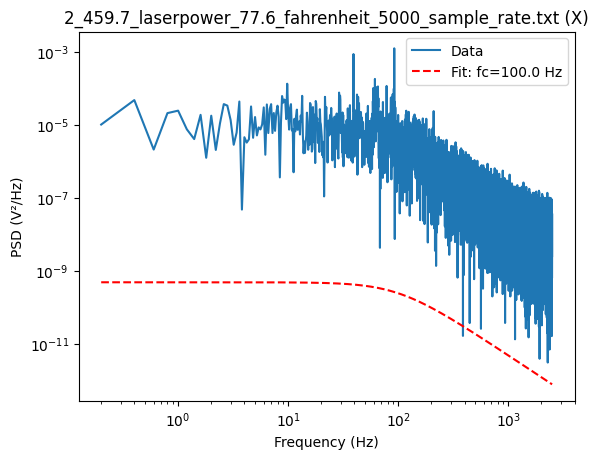

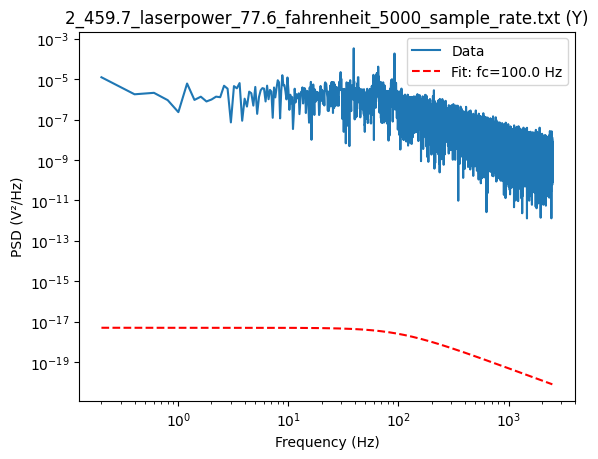

10_15\309.5_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


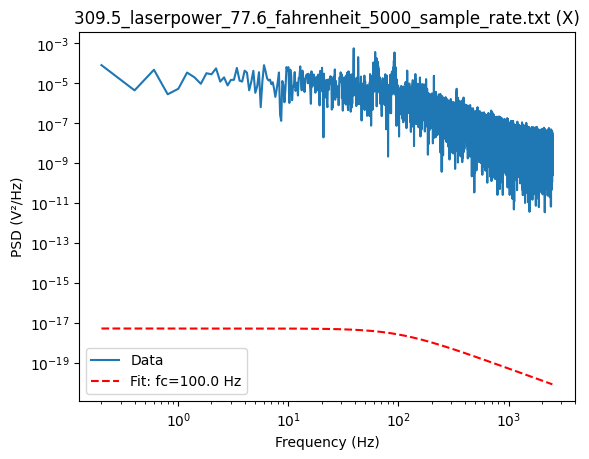

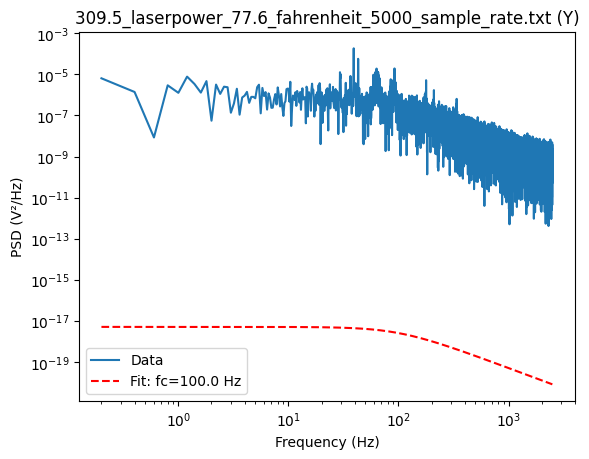

10_15\401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate.txt


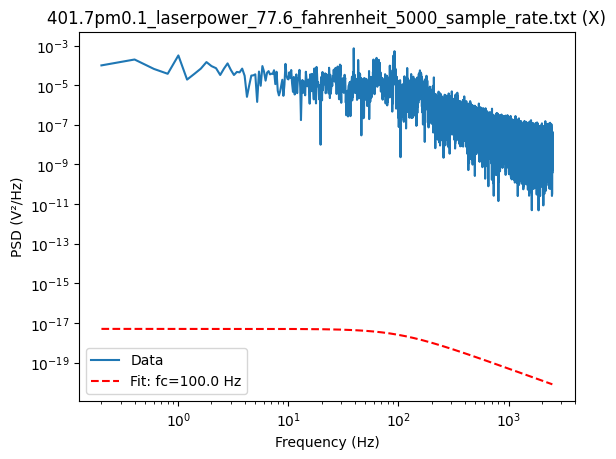

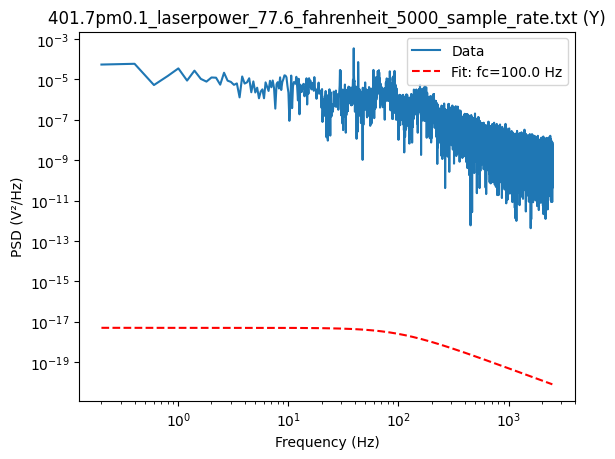

10_15\493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse Settingse.txt
10_15\493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt
10_15\81pm2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse Settingse.txt
10_15\81pm2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt

=== Summary of Fits ===
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  fc=100.0 Hz  k=1.901e-05 N/m  kB=1.124e-23 J/K
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  fc=100.0 Hz  k=1.901e-05 N/m  kB=1.014e-24 J/K
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  fc=100.0 Hz  k=1.901e-05 N/m  kB=3.734e-23 J/K
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  fc=100.0 Hz  k=1.901e-05 N/m  kB=3.223e-24 J/K
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  fc=100.0 Hz  k=1.901e-05 N/m  kB=7.685e-23 J/K
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  fc=100.0 Hz  k=1.901e-05 N/m  kB=8.354e-24 J/K
2_291

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, os
from scipy.optimize import curve_fit

# -----------------------------
# Experimental & physical parameters
# -----------------------------
eta = 0.001  # viscosity of water (Pa·s)
d_bead = 3.21e-6  # bead diameter (m)
r_bead = d_bead / 2
alpha = 1e-6  # QPD calibration factor (m/V) -- replace with your actual value
folder = "10_15"

# -----------------------------
# Define Lorentzian PSD model
# -----------------------------
def lorentzian(f, D, fc):
    """Lorentzian model for PSD"""
    return (D / (2 * np.pi**2)) / (fc**2 + f**2)

# -----------------------------
# Helper functions
# -----------------------------
def read_metadata(filename):
    """
    Extract laser power, temperature, and sample rate from filename.
    Example: 309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt
    """
    match = re.search(r"([\d\.pm]+)_laserpower_([\d\.]+)_fahrenheit_([\d]+)_sample_rate", filename)
    if match:
        laser = match.group(1)
        temp_F = float(match.group(2))
        temp_K = (temp_F - 32) * 5/9 + 273.15
        fs = float(match.group(3))
        return laser, temp_K, fs
    return None, None, None

def compute_psd(signal, fs):
    """Compute single-sided power spectral density (PSD)."""
    N = len(signal)
    fft = np.fft.fft(signal - np.mean(signal))
    psd = (2 * np.abs(fft[:N//2])**2) / (fs * N)
    f = np.fft.fftfreq(N, 1/fs)[:N//2]
    return f[1:], psd[1:]  # skip DC

# -----------------------------
# Main analysis loop
# -----------------------------
results = []

for filepath in glob.glob(os.path.join(folder, "*.txt")):
    print(filepath)
    if filepath.endswith("_sample_rate.txt"):
        filename = os.path.basename(filepath)
        laser, T, fs = read_metadata(filename)
        if fs is None:
            print(f"Skipping {filename}: metadata not found.")
            continue

        # Load 4-column data: QPDx, QPDy, strainx, strainy
        data = np.loadtxt(filepath, delimiter='\t')
        qpd_x, qpd_y = data[:,0], data[:,1]

        for axis, signal in zip(['X', 'Y'], [qpd_x, qpd_y]):
            f, psd = compute_psd(signal, fs)

            # Fit Lorentzian in log frequency region (avoid DC & high freq noise)
            mask = (f > 1) & (f < fs/10)
            try:
                popt, _ = curve_fit(lorentzian, f[mask], psd[mask], p0=[1e-12, 100])
                D_fit, fc_fit = popt
            except RuntimeError:
                print(f"Fit failed for {filename} {axis}")
                continue

            gamma = 6 * np.pi * eta * r_bead
            k_trap = 2 * np.pi * gamma * fc_fit

            var_x = np.var(signal) * alpha**2  # convert from V² → m²
            kB_est = k_trap * var_x / T

            results.append({
                "filename": filename,
                "axis": axis,
                "laser": laser,
                "T(K)": T,
                "fs(Hz)": fs,
                "fc(Hz)": fc_fit,
                "k(N/m)": k_trap,
                "kB_est(J/K)": kB_est
            })

            # Plot PSD + fit
            plt.figure()
            plt.loglog(f, psd, label='Data')
            plt.loglog(f, lorentzian(f, *popt), 'r--', label=f'Fit: fc={fc_fit:.1f} Hz')
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("PSD (V²/Hz)")
            plt.title(f"{filename} ({axis})")
            plt.legend()
            plt.show()

# -----------------------------
# Print summary of results
# -----------------------------
print("\n=== Summary of Fits ===")
for r in results:
    print(f"{r['filename']:40s}  Axis={r['axis']}  fc={r['fc(Hz)']:.1f} Hz  "
          f"k={r['k(N/m)']:.3e} N/m  kB={r['kB_est(J/K)']:.3e} J/K")
    
if results:
    kB_vals = [r["kB_est(J/K)"] for r in results]
    print(f"\nAverage estimated Boltzmann constant: {np.mean(kB_vals):.3e} ± {np.std(kB_vals):.3e} J/K")

C:\Users\megan\AppData\Local\Temp\ipykernel_30632\3240106644.py:82: RuntimeWarning: invalid value encountered in sqrt
  alpha = np.sqrt(kB * T / (kappa * varV))


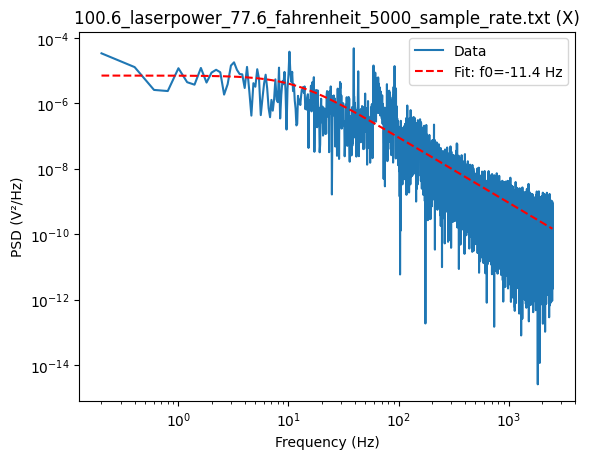

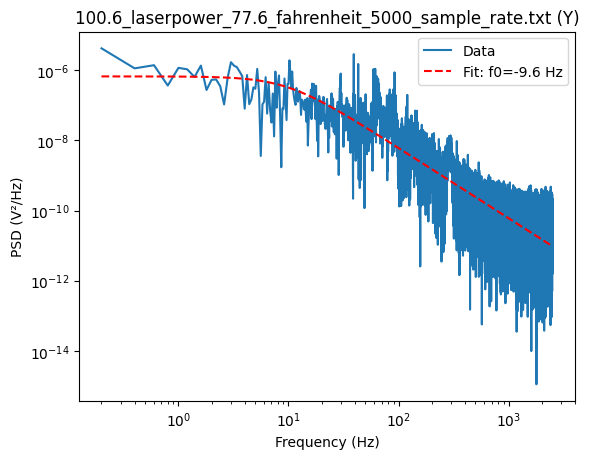

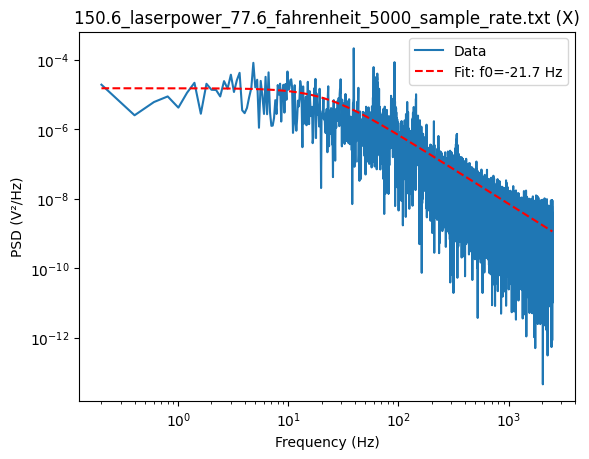

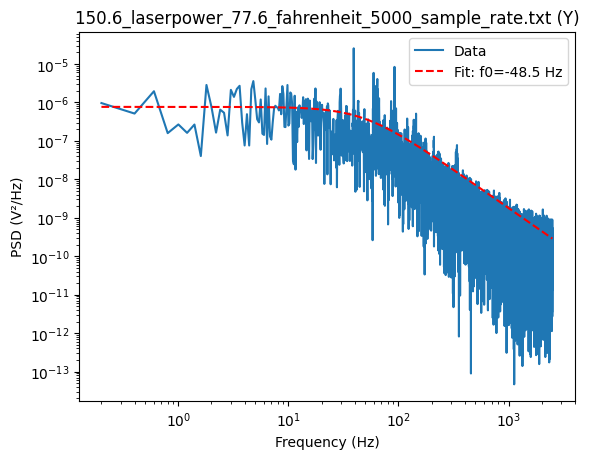

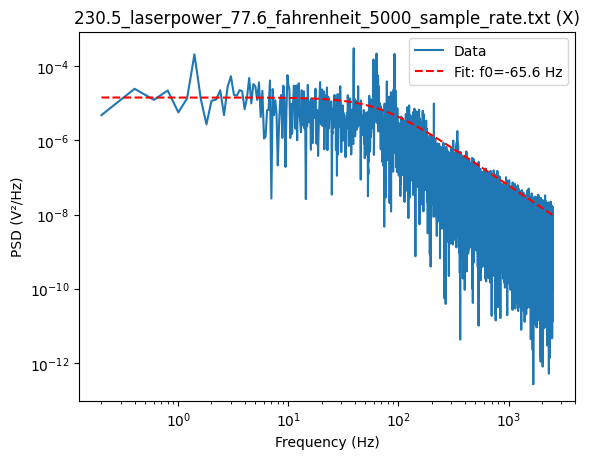

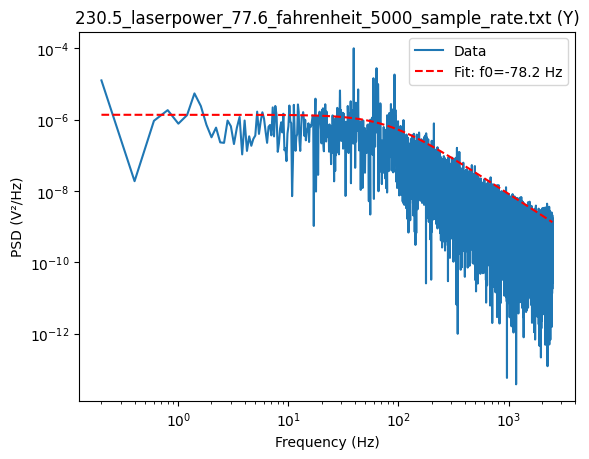

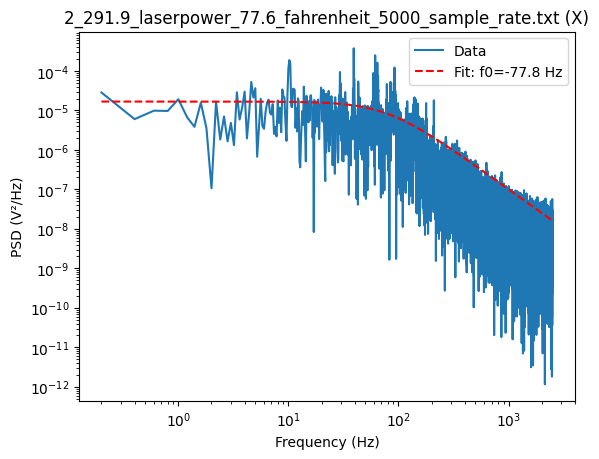

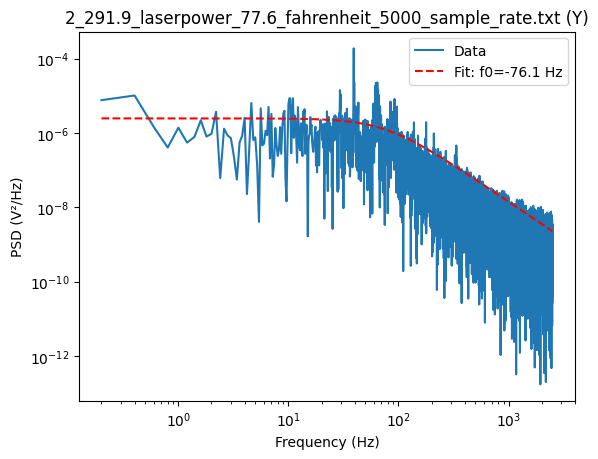

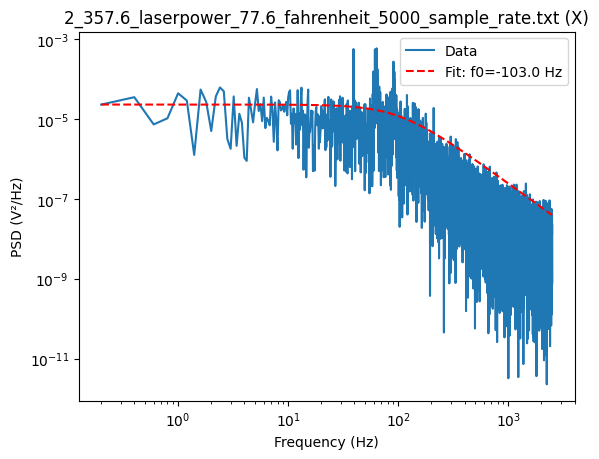

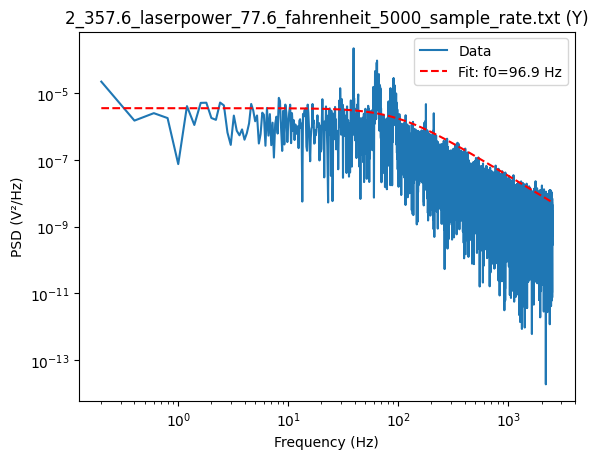

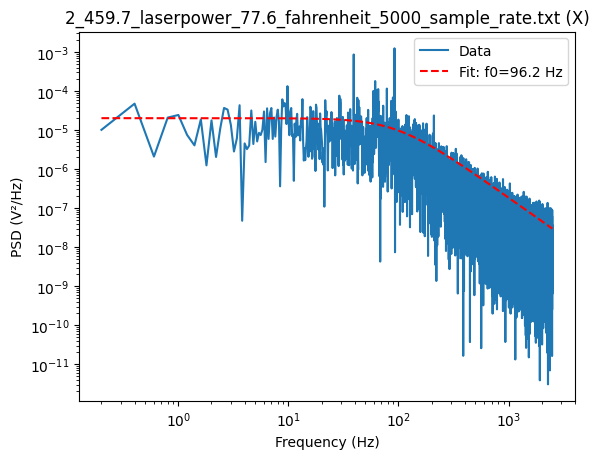

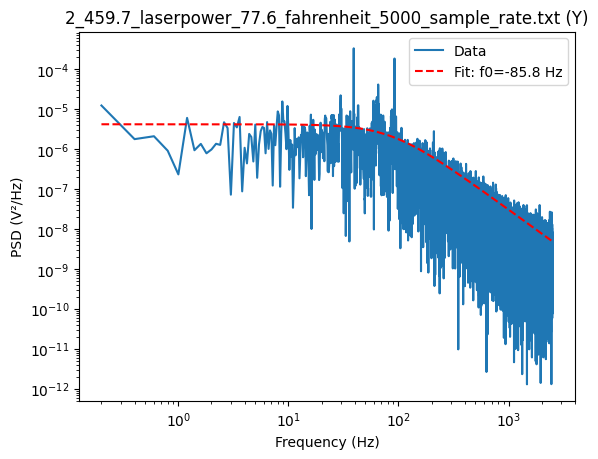

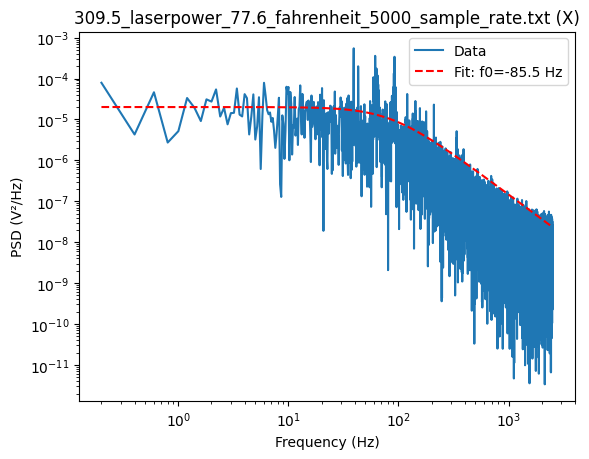

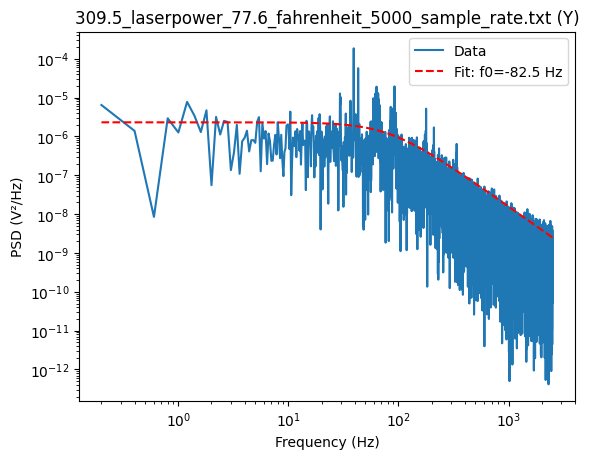

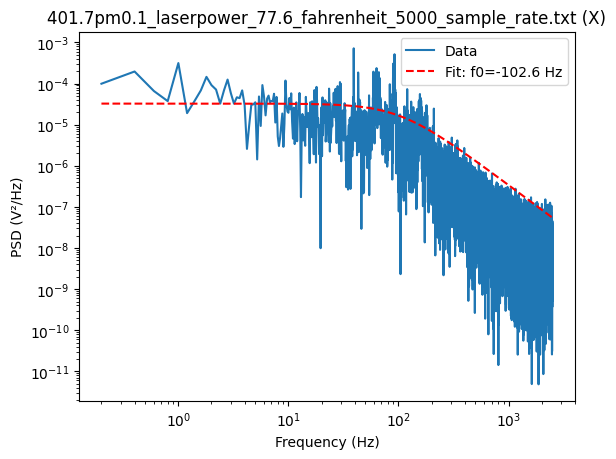

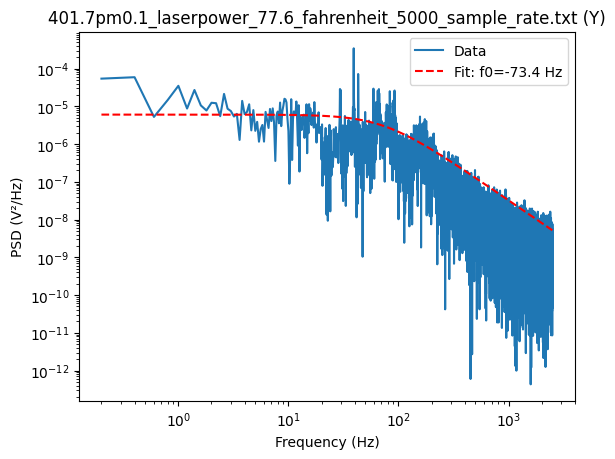


=== Summary of Fits ===
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  f0=-11.4 Hz  κ=-2.173e-06 N/m  α=nan m/V
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  f0=-9.6 Hz  κ=-1.829e-06 N/m  α=nan m/V
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  f0=-21.7 Hz  κ=-4.117e-06 N/m  α=nan m/V
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  f0=-48.5 Hz  κ=-9.216e-06 N/m  α=nan m/V
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  f0=-65.6 Hz  κ=-1.247e-05 N/m  α=nan m/V
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  f0=-78.2 Hz  κ=-1.486e-05 N/m  α=nan m/V
2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  f0=-77.8 Hz  κ=-1.479e-05 N/m  α=nan m/V
2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=Y  f0=-76.1 Hz  κ=-1.447e-05 N/m  α=nan m/V
2_357.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  Axis=X  f0=-103.0 Hz  κ=-1.958e-05 N/m  α=nan m/V
2_357.6_laserpower_77.6_fahrenhei

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, os
from scipy.optimize import curve_fit

# -----------------------------
# Physical parameters
# -----------------------------
eta = 0.001  # Pa·s (viscosity of water at room temp)
d_bead = 3.21e-6  # m
r_bead = d_bead / 2
kB = 1.380649e-23  # J/K
folder = "10_15"

# -----------------------------
# Helper functions
# -----------------------------
def read_metadata(filename):
    """
    Extract laser power, temperature, and sample rate from filename.
    Example: 309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt
    """
    match = re.search(r"([\d\.pm]+)_laserpower_([\d\.]+)_fahrenheit_([\d]+)_sample_rate", filename)
    if match:
        laser = match.group(1)
        temp_F = float(match.group(2))
        temp_K = (temp_F - 32) * 5/9 + 273.15
        fs = float(match.group(3))
        return laser, temp_K, fs
    return None, None, None

def compute_psd(signal, fs):
    """Compute single-sided PSD (V²/Hz)."""
    N = len(signal)
    fft = np.fft.fft(signal - np.mean(signal))
    psd = (2 * np.abs(fft[:N//2])**2) / (fs * N)
    f = np.fft.fftfreq(N, 1/fs)[:N//2]
    return f[1:], psd[1:]  # skip DC

def psd_model(f, f0, A):
    """Fit function in voltage units: A / (f^2 + f0^2)."""
    return A / (f**2 + f0**2)

# -----------------------------
# Main analysis loop
# -----------------------------
results = []

for filepath in glob.glob(os.path.join(folder, "*.txt")):
    if filepath.endswith("_sample_rate.txt"):
        filename = os.path.basename(filepath)
        laser, T, fs = read_metadata(filename)
        if fs is None:
            print(f"Skipping {filename}: metadata not found.")
            continue

        data = np.loadtxt(filepath, delimiter='\t')
        qpd_x, qpd_y = data[:,0], data[:,1]

        beta = 3 * np.pi * eta * d_bead

        for axis, signal in zip(['X','Y'], [qpd_x, qpd_y]):
            f, psd = compute_psd(signal, fs)

            # Fit region (avoid low and high freq noise)
            mask = (f > 1) & (f < fs/10)
            f_fit, psd_fit = f[mask], psd[mask]

            # Fit PSD to A / (f^2 + f0^2)
            try:
                popt, _ = curve_fit(psd_model, f_fit, psd_fit, p0=[100, np.max(psd_fit)])
                f0_fit, A_fit = popt
            except RuntimeError:
                print(f"Fit failed for {filename} ({axis})")
                continue

            # Compute trap stiffness
            kappa = 2 * np.pi * beta * f0_fit  # N/m

            # Compute calibration factor α (m/V)
            varV = np.var(signal)
            alpha = np.sqrt(kB * T / (kappa * varV))

            results.append({
                "filename": filename,
                "axis": axis,
                "laser": laser,
                "T(K)": T,
                "fs(Hz)": fs,
                "f0(Hz)": f0_fit,
                "kappa(N/m)": kappa,
                "alpha(m/V)": alpha
            })

            # Plot PSD and fit
            plt.figure()
            plt.loglog(f, psd, label="Data")
            plt.loglog(f, psd_model(f, f0_fit, A_fit), 'r--',
                    label=f"Fit: f0={f0_fit:.1f} Hz")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("PSD (V²/Hz)")
            plt.title(f"{filename} ({axis})")
            plt.legend()
            plt.show()

# -----------------------------
# Print summary of results
# -----------------------------
print("\n=== Summary of Fits ===")
for r in results:
    print(f"{r['filename']:40s}  Axis={r['axis']}  "
        f"f0={r['f0(Hz)']:.1f} Hz  κ={r['kappa(N/m)']:.3e} N/m  "
        f"α={r['alpha(m/V)']:.3e} m/V")

if results:
    alphas = [r["alpha(m/V)"] for r in results]
    print(f"\nAverage α: {np.mean(alphas):.3e} ± {np.std(alphas):.3e} m/V")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, os
from scipy.optimize import curve_fit

# -----------------------------
# Physical parameters
# -----------------------------
eta = 0.001  # Pa·s (viscosity of water at room temp)
d_bead = 3.21e-6  # m
r_bead = d_bead / 2
kB = 1.380649e-23  # J/K
folder = "10_15"

# -----------------------------
# Helper functions
# -----------------------------
def read_metadata(filename):
    """
    Extract laser power, temperature, and sample rate from filename.
    Example: 309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt
    """
    match = re.search(r"([\d\.pm]+)_laserpower_([\d\.]+)_fahrenheit_([\d]+)_sample_rate", filename)
    if match:
        laser = match.group(1)
        temp_F = float(match.group(2))
        temp_K = (temp_F - 32) * 5/9 + 273.15
        fs = float(match.group(3))
        return laser, temp_K, fs
    return None, None, None

def compute_psd(signal, fs):
    """Compute single-sided PSD (V²/Hz)."""
    N = len(signal)
    fft = np.fft.fft(signal - np.mean(signal))
    psd = (2 * np.abs(fft[:N//2])**2) / (fs * N)
    f = np.fft.fftfreq(N, 1/fs)[:N//2]
    return f[1:], psd[1:]  # skip DC

def psd_model(f, f0, A):
    """Fit function in voltage units: A / (f^2 + f0^2)."""
    return A / (f**2 + f0**2)

# -----------------------------
# Main analysis loop
# -----------------------------
results = []

for filepath in glob.glob(os.path.join(folder, "*.txt")):
    if filepath.endswith("_sample_rate.txt"):
        filename = os.path.basename(filepath)
        laser, T, fs = read_metadata(filename)
        if fs is None:
            print(f"Skipping {filename}: metadata not found.")
            continue

        data = np.loadtxt(filepath, delimiter='\t')
        qpd_x, qpd_y = data[:,0], data[:,1]

        beta = 3 * np.pi * eta * d_bead

        for axis, signal in zip(['X','Y'], [qpd_x, qpd_y]):
            f, psd = compute_psd(signal, fs)

            # Fit region (avoid low and high freq noise)
            mask = (f > 1) & (f < fs/10)
            f_fit, psd_fit = f[mask], psd[mask]

            # Fit PSD to A / (f^2 + f0^2)
            try:
                popt, _ = curve_fit(psd_model, f_fit, psd_fit, p0=[100, np.max(psd_fit)])
                f0_fit, A_fit = popt
            except RuntimeError:
                print(f"Fit failed for {filename} ({axis})")
                continue

            # Compute trap stiffness
            kappa = 2 * np.pi * beta * f0_fit  # N/m

            # Compute calibration factor α (m/V)
            varV = np.var(signal)
            alpha = np.sqrt(kB * T / (kappa * varV))

            results.append({
                "filename": filename,
                "axis": axis,
                "laser": laser,
                "T(K)": T,
                "fs(Hz)": fs,
                "f0(Hz)": f0_fit,
                "kappa(N/m)": kappa,
                "alpha(m/V)": alpha
            })

            # Plot PSD and fit
            plt.figure()
            plt.loglog(f, psd, label="Data")
            plt.loglog(f, psd_model(f, f0_fit, A_fit), 'r--',
                    label=f"Fit: f0={f0_fit:.1f} Hz")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("PSD (V²/Hz)")
            plt.title(f"{filename} ({axis})")
            plt.legend()
            plt.show()

# -----------------------------
# Print summary of results
# -----------------------------
print("\n=== Summary of Fits ===")
for r in results:
    print(f"{r['filename']:40s}  Axis={r['axis']}  "
        f"f0={r['f0(Hz)']:.1f} Hz  κ={r['kappa(N/m)']:.3e} N/m  "
        f"α={r['alpha(m/V)']:.3e} m/V")

if results:
    alphas = [r["alpha(m/V)"] for r in results]
    print(f"\nAverage α: {np.mean(alphas):.3e} ± {np.std(alphas):.3e} m/V")



Processing: 10_15\10_15_data\100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


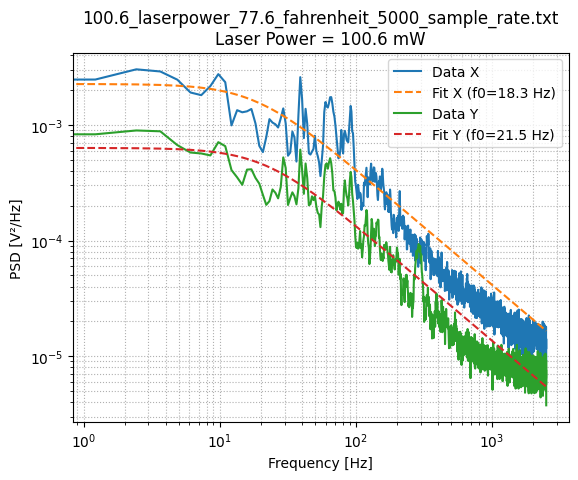


Processing: 10_15\10_15_data\150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


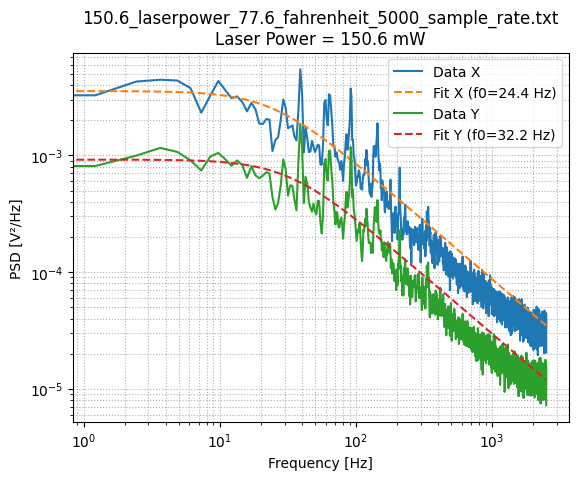


Processing: 10_15\10_15_data\230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


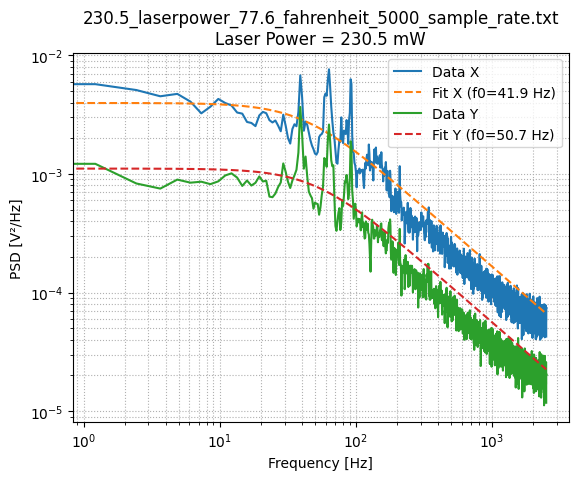


Processing: 10_15\10_15_data\2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\2_357.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\2_459.7_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


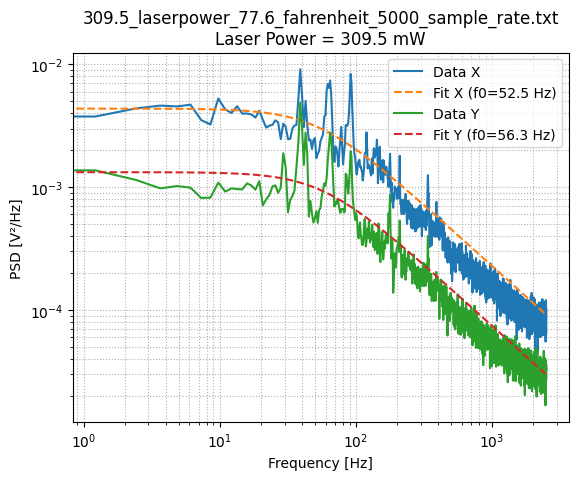


Processing: 10_15\10_15_data\401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate.txt


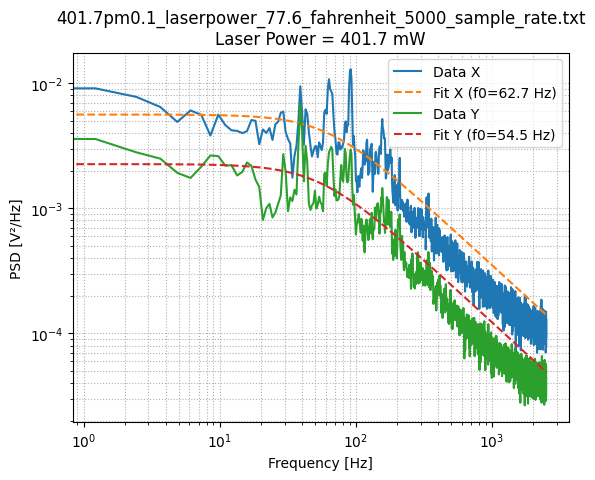


Processing: 10_15\10_15_data\493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt


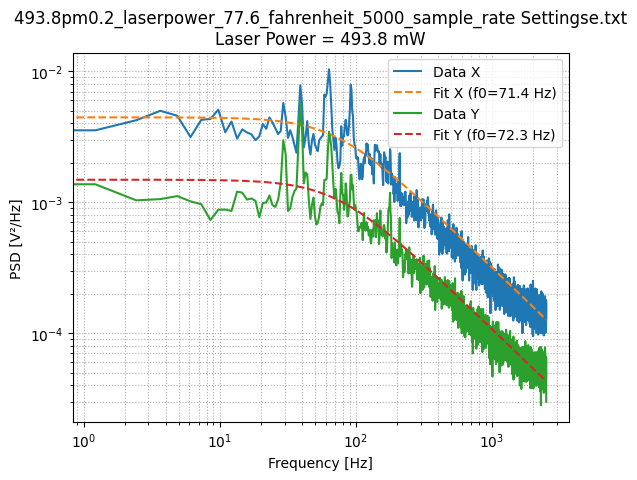


Processing: 10_15\10_15_data\81pm2_laserpower_77.6_fahrenheit_5000_sample_rate.txt


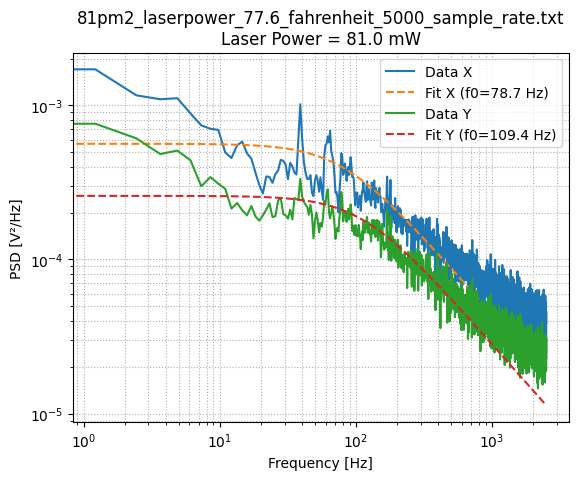


=== Summary of Fits ===
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=18.29 Hz  κx=3.482e-06 N/m  kB_x=1.719e-12  |  f0_y=21.49 Hz  κy=4.091e-06 N/m  kB_y=1.857e-13
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=24.45 Hz  κx=4.654e-06 N/m  kB_x=7.594e-12  |  f0_y=32.21 Hz  κy=6.132e-06 N/m  kB_y=8.821e-13
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=41.87 Hz  κx=7.971e-06 N/m  kB_x=2.767e-11  |  f0_y=50.70 Hz  κy=9.652e-06 N/m  kB_y=3.176e-12
309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=52.49 Hz  κx=9.993e-06 N/m  kB_x=5.247e-11  |  f0_y=56.27 Hz  κy=1.071e-05 N/m  kB_y=5.571e-12
401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=62.68 Hz  κx=1.193e-05 N/m  kB_x=1.244e-10  |  f0_y=54.49 Hz  κy=1.037e-05 N/m  kB_y=1.517e-11
493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt  f0_x=71.38 Hz  κx=1.359e-05 N/m  kB_x=1.009e-10  |  f0_y=72.35 Hz  κy=1.377e-05 N/m  kB_y=1.156e-11
81pm2_laserpower_77.6_fah

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from scipy.signal import welch

# ======== Constants ========
eta = 1.0016e-3    # Viscosity of water [Pa·s]
d = 3.21e-6        # Bead diameter [m]
T_fahrenheit = 77.6
T_kelvin = (T_fahrenheit - 32) * 5/9 + 273.15
beta = 3 * np.pi * eta * d

# ======== PSD model ========
def psd_model(f, s, f0):
    """Theoretical Lorentzian PSD model."""
    return s / (f**2 + f0**2)

def asd_model(f, s, f0):
    return np.sqrt(s / (f**2 + f0**2))

# ======== File reading and processing ========
folder = "10_15\\10_15_data"  # Folder containing data files
files = glob.glob(f"{folder}/*.txt")

results = []

for file in files:
    print(f"\nProcessing: {file}")
    # Parse metadata from filename
    name = file.split("\\")[-1]
    parts = name.split("_")
    try:
        laser_power = parts[0]
        if "pm" in laser_power:
            # Handle e.g., "81pm2" -> 81 ± 2
            laser_power = float(laser_power.split("pm")[0])
        else:
            laser_power = float(laser_power)
        sample_rate = float(parts[4])
    except Exception as e:
        print("Error parsing filename:", e)
        continue

    # Load data
    data = np.loadtxt(file, delimiter="\t")
    qpd_x = data[:, 0]
    qpd_y = data[:, 1]

    # Remove DC offset
    qpd_x -= np.mean(qpd_x)
    qpd_y -= np.mean(qpd_y)

    # === Compute PSD using Welch’s method ===
    f, psd_x = welch(qpd_x, fs=sample_rate, nperseg=2**12)
    f, psd_y = welch(qpd_y, fs=sample_rate, nperseg=2**12)

    # === Convert to Amplitude Spectral Density (ASD) ===
    asd_x = np.sqrt(psd_x)
    asd_y = np.sqrt(psd_y)

    # === Fit Lorentzian to ASD ===
    valid = (f > 1) & (f < sample_rate/4)
    popt_x, _ = curve_fit(asd_model, f[valid], asd_x[valid], p0=[1e-6, 100], bounds = (0,np.inf))
    popt_y, _ = curve_fit(asd_model, f[valid], asd_y[valid], p0=[1e-6, 100], bounds = (0,np.inf))

    s_x, f0_x = popt_x
    s_y, f0_y = popt_y

    s_x, f0_x = popt_x
    s_y, f0_y = popt_y

    # ===== Compute trap stiffness =====
    alpha_x = 2 * np.pi * beta * f0_x
    alpha_y = 2 * np.pi * beta * f0_y

    # ===== Compute variance (equipartition) =====
    var_x = np.var(qpd_x)
    var_y = np.var(qpd_y)

    # ===== Estimate Boltzmann constant =====
    # kB = alpha * <x^2> / T
    # kB_x = alpha_x * var_x / T_kelvin
    # kB_y = alpha_y * var_y / T_kelvin

    # === Compute Boltzmann constant directly from ASD fit amplitude ===
    # ASD model: asd(f) = sqrt(s / (f^2 + f0^2))
    # PSD amplitude: s = kB * T / (pi^2 * beta)  => kB = s * pi^2 * beta / T
    kB_x = s_x * np.pi**2 * beta / T_kelvin
    kB_y = s_y * np.pi**2 * beta / T_kelvin


    results.append({
        "file": name,
        "laser_power": laser_power,
        "f0_x": f0_x,
        "f0_y": f0_y,
        "alpha_x": alpha_x,
        "alpha_y": alpha_y,
        "kB_x": kB_x,
        "kB_y": kB_y
    })

    # ===== Plot =====
    plt.figure()
    plt.loglog(f, asd_x, label="Data X")
    plt.loglog(f, asd_model(f, *popt_x), '--', label=f"Fit X (f0={f0_x:.1f} Hz)")
    plt.loglog(f, asd_y, label="Data Y")
    plt.loglog(f, asd_model(f, *popt_y), '--', label=f"Fit Y (f0={f0_y:.1f} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("PSD [V²/Hz]")
    plt.title(f"{name}\nLaser Power = {laser_power} mW")
    plt.legend()
    plt.grid(True, which='both', ls=':')
    plt.show()

# ===== Print Summary =====
print("\n=== Summary of Fits ===")
for r in results:
    print(f"{r['file']:40s}  "
          f"f0_x={r['f0_x']:.2f} Hz  κx={r['alpha_x']:.3e} N/m  "
          f"kB_x={r['kB_x']:.3e}  |  "
          f"f0_y={r['f0_y']:.2f} Hz  κy={r['alpha_y']:.3e} N/m  "
          f"kB_y={r['kB_y']:.3e}")



Processing: 10_15\10_15_data\100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


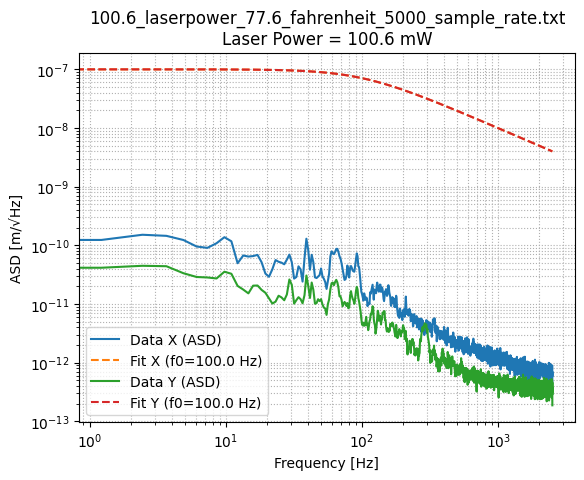


Processing: 10_15\10_15_data\150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt


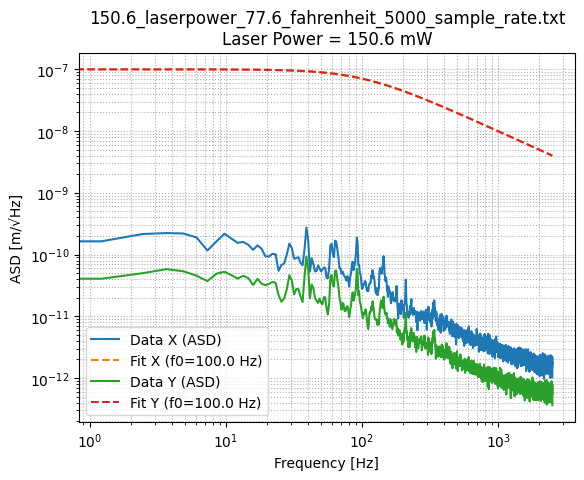


Processing: 10_15\10_15_data\230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


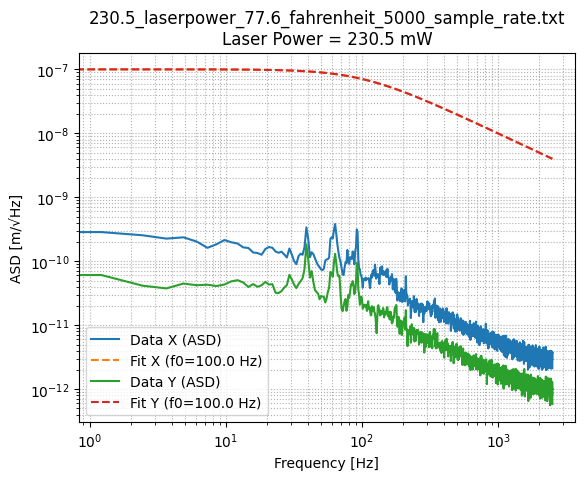


Processing: 10_15\10_15_data\2_291.9_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\2_357.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\2_459.7_laserpower_77.6_fahrenheit_5000_sample_rate.txt
Error parsing filename: could not convert string to float: 'fahrenheit'

Processing: 10_15\10_15_data\309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt


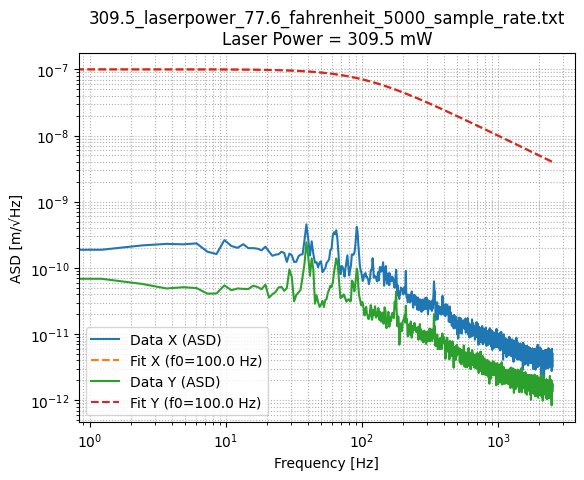


Processing: 10_15\10_15_data\401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate.txt


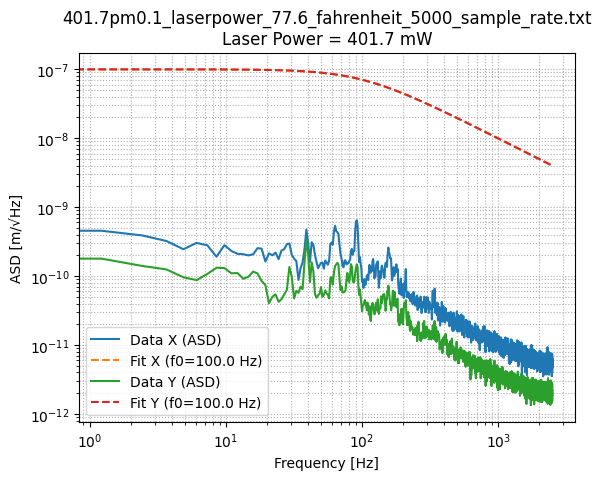


Processing: 10_15\10_15_data\493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt


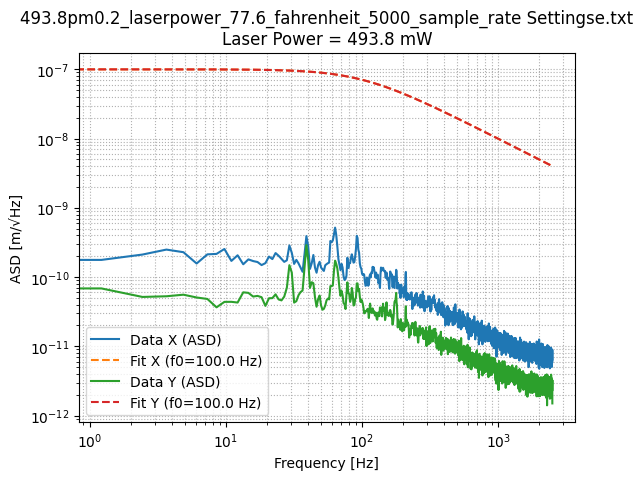


Processing: 10_15\10_15_data\81pm2_laserpower_77.6_fahrenheit_5000_sample_rate.txt


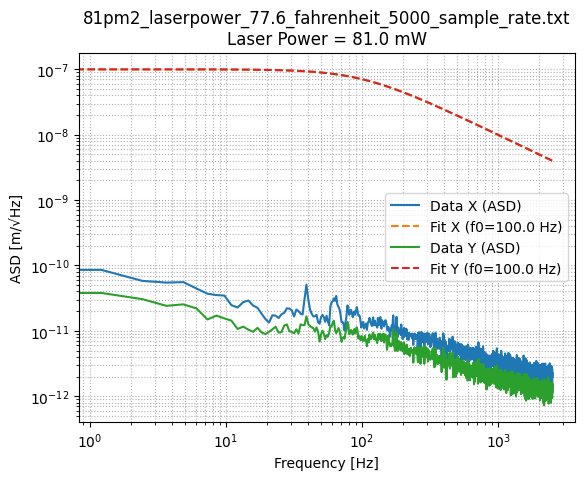


=== Summary of Fits ===
100.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=2.813e-26  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=2.540e-27
150.6_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=9.351e-26  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=8.069e-27
230.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=1.924e-25  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=2.092e-26
309.5_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=3.387e-25  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=3.714e-26
401.7pm0.1_laserpower_77.6_fahrenheit_5000_sample_rate.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=6.644e-25  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=9.601e-26
493.8pm0.2_laserpower_77.6_fahrenheit_5000_sample_rate Settingse.txt  f0_x=100.00 Hz  κx=1.904e-05 N/m  kB_x=4.113e-25  |  f0_y=100.00 Hz  κy=1.904e-05 N/m  kB_y=5.276e-26
81pm2_laserpo

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from scipy.signal import welch

# ======== Constants ========
eta = 1.0016e-3    # Pa·s
d = 3.21e-6        # m
T_fahrenheit = 77.6
T_kelvin = (T_fahrenheit - 32) * 5/9 + 273.15
beta = 3 * np.pi * eta * d  # N·s/m

# QPD calibration: volts -> meters
# Replace this with your actual calibration factor!
volts_to_meters = 50e-9  # 50 nm/mV

# ======== ASD model ========
def asd_model(f, s, f0):
    """Amplitude spectral density (ASD) Lorentzian model."""
    return np.sqrt(s / (f**2 + f0**2))

# ======== File reading ========
folder = "10_15\\10_15_data"
files = glob.glob(f"{folder}/*.txt")

results = []

for file in files:
    print(f"\nProcessing: {file}")
    
    # Parse metadata from filename
    name = file.split("\\")[-1]
    parts = name.split("_")
    try:
        laser_power = parts[0]
        if "pm" in laser_power:
            laser_power = float(laser_power.split("pm")[0])
        else:
            laser_power = float(laser_power)
        sample_rate = float(parts[4])  # Make sure this matches your filenames
    except Exception as e:
        print("Error parsing filename:", e)
        continue

    # Load data
    data = np.loadtxt(file, delimiter="\t")
    qpd_x = data[:, 0]
    qpd_y = data[:, 1]

    # Remove DC offset
    qpd_x -= np.mean(qpd_x)
    qpd_y -= np.mean(qpd_y)

    # Convert to meters
    qpd_x_m = qpd_x * volts_to_meters
    qpd_y_m = qpd_y * volts_to_meters

    # === Compute PSD and ASD using Welch ===
    f, psd_x = welch(qpd_x_m, fs=sample_rate, nperseg=2**12)
    f, psd_y = welch(qpd_y_m, fs=sample_rate, nperseg=2**12)
    asd_x = np.sqrt(psd_x)
    asd_y = np.sqrt(psd_y)

    # === Fit ASD Lorentzian ===
    valid = (f > 1) & (f < sample_rate/4)
    popt_x, _ = curve_fit(asd_model, f[valid], asd_x[valid], p0=[1e-10, 100], bounds=(0,np.inf))
    popt_y, _ = curve_fit(asd_model, f[valid], asd_y[valid], p0=[1e-10, 100], bounds=(0,np.inf))

    s_x, f0_x = popt_x
    s_y, f0_y = popt_y

    # === Trap stiffness ===
    alpha_x = 2 * np.pi * beta * f0_x
    alpha_y = 2 * np.pi * beta * f0_y

    # === Variance and Boltzmann constant ===
    var_x = np.var(qpd_x_m)
    var_y = np.var(qpd_y_m)

    kB_x = alpha_x * var_x / T_kelvin
    kB_y = alpha_y * var_y / T_kelvin

    results.append({
        "file": name,
        "laser_power": laser_power,
        "f0_x": f0_x,
        "f0_y": f0_y,
        "alpha_x": alpha_x,
        "alpha_y": alpha_y,
        "kB_x": kB_x,
        "kB_y": kB_y
    })

    # === Plot ASD ===
    plt.figure()
    plt.loglog(f, asd_x, label="Data X (ASD)")
    plt.loglog(f, asd_model(f, *popt_x), '--', label=f"Fit X (f0={f0_x:.1f} Hz)")
    plt.loglog(f, asd_y, label="Data Y (ASD)")
    plt.loglog(f, asd_model(f, *popt_y), '--', label=f"Fit Y (f0={f0_y:.1f} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("ASD [m/√Hz]")
    plt.title(f"{name}\nLaser Power = {laser_power} mW")
    plt.legend()
    plt.grid(True, which='both', ls=':')
    plt.show()

# === Summary ===
print("\n=== Summary of Fits ===")
for r in results:
    print(f"{r['file']:40s}  "
          f"f0_x={r['f0_x']:.2f} Hz  κx={r['alpha_x']:.3e} N/m  "
          f"kB_x={r['kB_x']:.3e}  |  "
          f"f0_y={r['f0_y']:.2f} Hz  κy={r['alpha_y']:.3e} N/m  "
          f"kB_y={r['kB_y']:.3e}")
